In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv('Sales.csv')

In [12]:
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [13]:
# Remove rows which has Nan values in any column
data = data.dropna()

In [ ]:
# Extract numeric values from the 'Storage' and memory column
data['Storage'] = data['Storage'].str.extract('(\d+)').astype(int)
data['Memory'] = data['Memory'].str.extract('(\d+)').astype(int)


In [15]:
data_subset = data[['Storage', 'Original Price','Rating','Discount','Memory']]

In [16]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_subset)

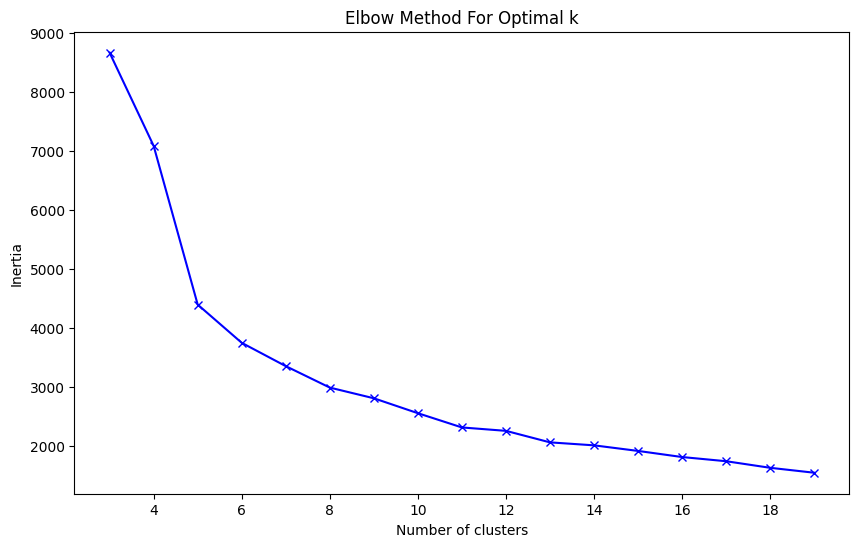

In [18]:
# KMeans Clustering

from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters

inertia = []
K = range(3, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()




In [20]:
kmeans = KMeans(n_clusters=10, random_state=0)
data_subset['labels'] = kmeans.fit(data_scaled).labels_

C:\Users\Kisan\AppData\Local\Temp\ipykernel_14736\532882550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['labels'] = kmeans.fit(data_scaled).labels_


In [22]:
data_subset.groupby('labels').agg({'mean', 'count','min','max'})

Storage                 Original Price                       \
              mean  max count  min           mean     max count    min   
labels                                                                   
0       256.000000  256   149  256   70833.181208  139900   149  28999   
1        49.125506  100   741    2   15384.801619   42021   741   1000   
2       169.353846  256    65   32  103160.846154  189999    65  44999   
3        35.160920  128   348    2   12025.936782   56999   348   1099   
4        32.038462  512    52    2    6691.346154   17599    52   1700   
5        93.299539  128   217    1   64747.990783  179900   217  19990   
6       136.774951  256   511  100   22690.776908   49980   511   1549   
7       512.000000  512    41  512  127770.560976  179999    41  49999   
8       107.755102  256   147   16   35845.564626   95999   147  16990   
9        30.955272   64   626    2   12585.448882   62990   626   1000   

          Rating                      Discount                      \
            mean  max count  min          mean    max count    min   
labels                                                               
0       4.510738  5.0   149  4.1   1943.261745  15901   149      0   
1       4.367611  5.0   741  4.3    775.655870   5500   741  -8000   
2       4.430769  4.7    65  3.0  32221.892308  75000    65  19991   
3       3.742816  3.9   348  2.3    569.844828  12925   348      0   
4       3.775000  4.5    52  2.4    358.980769   5646    52      0   
5       4.535023  5.0   217  4.2    861.087558   7000   217      0   
6       4.330528  4.8   511  4.0   1499.681018   5000   511      0   
7       4.609756  4.7    41  4.3   2000.024390  23000    41      0   
8       4.323129  4.6   147  4.0   8332.993197  22000   147   4960   
9       4.105911  4.2   626  4.0    406.388179   8109   626      0   

            Memory                  
              mean  max count  min  
labels                              
0         6.295302   12   149    2  
1         3.789474  100   741    1  
2         6.800000   12    65    4  
3         4.954023   64   348    1  
4       541.538462  768    52  512  
5         4.013825   12   217    1  
6         7.407045  153   511    2  
7         6.097561   16    41    4  
8         5.836735   12   147    2  
9         3.904153  128   626    1